# Lab | Unsupervised Learning Intro

## Day 1

In [4]:
import requests
from bs4 import BeautifulSoup
import spotipy
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import pickle
import random

In [6]:
client_id=
client_secret=

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id,client_secret))

In [3]:
# Import CSV with song_ids created in previous lab into a Pandas Dataframe.

df = pd.read_csv('song_ids_final.csv')
df = df.drop(['Unnamed: 0'], axis=1)


,song_ids
0,4EeVfvBfvS6b6PIiGYfmJj
1,7j5MFzkTeepzmGLowja8U7
2,5RWuUAmzl33AhtHJw8EhFD
3,7lzlXGt9Jipr5KK0QBVsMF
4,1wFQoEmwyRZj5F9OdTgemA
5,75yTurRf08vPBW1fVWZwHH
6,2riRtoziRD8hRnpHYgVUHl
7,5IWH5pm6i8UR4HHCtXJMxP
8,54BeV1BkU4xjr7CW4Ving2
9,0Bg5w34y8MYRQhU9xg67mo


In [29]:
# Get the features for each song using the Spotify API and save to a Pandas dataframe.

song_ids = df['song_ids'].tolist()

song_features = []
batch_size = 100 

for i in range(0, len(song_ids), batch_size):
    batch_song_ids = song_ids[i:i+batch_size]
    batch_features = sp.audio_features(batch_song_ids)


    if batch_features is not None:
        valid_features = [feat for feat in batch_features if feat is not None]
        song_features.extend(valid_features)

    time.sleep(0.1) 

df_features = pd.DataFrame(song_features)

In [32]:
len(song_ids)

53682

In [30]:
df_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.445,0.836,2,-4.934,0,0.0421,0.000567,0.000425,0.1970,0.0817,109.398,audio_features,4EeVfvBfvS6b6PIiGYfmJj,spotify:track:4EeVfvBfvS6b6PIiGYfmJj,https://api.spotify.com/v1/tracks/4EeVfvBfvS6b...,https://api.spotify.com/v1/audio-analysis/4EeV...,315867,4
1,0.296,0.588,5,-10.836,1,0.0465,0.181000,0.000146,0.3790,0.4300,143.813,audio_features,7j5MFzkTeepzmGLowja8U7,spotify:track:7j5MFzkTeepzmGLowja8U7,https://api.spotify.com/v1/tracks/7j5MFzkTeepz...,https://api.spotify.com/v1/audio-analysis/7j5M...,320653,4
2,0.699,0.678,7,-9.547,1,0.0504,0.005890,0.821000,0.0784,0.8720,129.995,audio_features,5RWuUAmzl33AhtHJw8EhFD,spotify:track:5RWuUAmzl33AhtHJw8EhFD,https://api.spotify.com/v1/tracks/5RWuUAmzl33A...,https://api.spotify.com/v1/audio-analysis/5RWu...,467513,4
3,0.292,0.933,0,-6.505,0,0.0910,0.001530,0.000000,0.9620,0.4700,145.882,audio_features,7lzlXGt9Jipr5KK0QBVsMF,spotify:track:7lzlXGt9Jipr5KK0QBVsMF,https://api.spotify.com/v1/tracks/7lzlXGt9Jipr...,https://api.spotify.com/v1/audio-analysis/7lzl...,237000,4
4,0.688,0.690,7,-9.656,1,0.0364,0.073100,0.177000,0.0777,0.5300,115.867,audio_features,1wFQoEmwyRZj5F9OdTgemA,spotify:track:1wFQoEmwyRZj5F9OdTgemA,https://api.spotify.com/v1/tracks/1wFQoEmwyRZj...,https://api.spotify.com/v1/audio-analysis/1wFQ...,245307,4


In [33]:
df_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [35]:
df_features = df_features.drop(['type','uri', 'track_href', 'analysis_url'], axis=1)

In [36]:
df_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.445,0.836,2,-4.934,0,0.0421,0.000567,0.000425,0.1970,0.0817,109.398,4EeVfvBfvS6b6PIiGYfmJj,315867,4
1,0.296,0.588,5,-10.836,1,0.0465,0.181000,0.000146,0.3790,0.4300,143.813,7j5MFzkTeepzmGLowja8U7,320653,4
2,0.699,0.678,7,-9.547,1,0.0504,0.005890,0.821000,0.0784,0.8720,129.995,5RWuUAmzl33AhtHJw8EhFD,467513,4
3,0.292,0.933,0,-6.505,0,0.0910,0.001530,0.000000,0.9620,0.4700,145.882,7lzlXGt9Jipr5KK0QBVsMF,237000,4
4,0.688,0.690,7,-9.656,1,0.0364,0.073100,0.177000,0.0777,0.5300,115.867,1wFQoEmwyRZj5F9OdTgemA,245307,4


In [37]:
# Export dataframe with song features to CSV.

df_features.to_csv('song_id_features.csv')

## Day 2

In [84]:
# Import CSV with song_ids and features created on Day 1.

df = pd.read_csv('song_id_features.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.445,0.836,2,-4.934,0,0.0421,0.000567,0.000425,0.1970,0.0817,109.398,4EeVfvBfvS6b6PIiGYfmJj,315867,4
1,0.296,0.588,5,-10.836,1,0.0465,0.181000,0.000146,0.3790,0.4300,143.813,7j5MFzkTeepzmGLowja8U7,320653,4
2,0.699,0.678,7,-9.547,1,0.0504,0.005890,0.821000,0.0784,0.8720,129.995,5RWuUAmzl33AhtHJw8EhFD,467513,4
3,0.292,0.933,0,-6.505,0,0.0910,0.001530,0.000000,0.9620,0.4700,145.882,7lzlXGt9Jipr5KK0QBVsMF,237000,4
4,0.688,0.690,7,-9.656,1,0.0364,0.073100,0.177000,0.0777,0.5300,115.867,1wFQoEmwyRZj5F9OdTgemA,245307,4


In [85]:
# Preprocessing data
# Check for NULL values
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
time_signature      0
dtype: int64

In [3]:
# Preprocessing data: check for correlation between variables
# plt.figure(figsize=(10, 10))
# sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize": 12})

In [87]:
# columns that are correlated: energy and acousticness, energy and loudness, loudness and acousticness 
df = df.drop(['energy', 'duration_ms', 'valence', 'time_signature'], axis=1)

In [4]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize": 12})

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53666 entries, 0 to 53665
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      53666 non-null  float64
 1   key               53666 non-null  int64  
 2   loudness          53666 non-null  float64
 3   mode              53666 non-null  int64  
 4   speechiness       53666 non-null  float64
 5   acousticness      53666 non-null  float64
 6   instrumentalness  53666 non-null  float64
 7   liveness          53666 non-null  float64
 8   tempo             53666 non-null  float64
 9   id                53666 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 4.1+ MB


In [90]:
# Preprocessing Data: scale columns using StandardScaler
y = df['id']
x = df.drop(['id'], axis=1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X

,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo
0,-0.546404,-0.903584,0.730926,-1.332889,-0.374006,-0.744581,-0.472015,-0.315373,-0.460036
1,-1.400040,-0.062371,-0.882915,0.750250,-0.336194,-0.091887,-0.473081,0.365329,0.787209
2,0.908788,0.498438,-0.530451,0.750250,-0.302678,-0.725325,2.664286,-0.758952,0.286427
3,-1.422956,-1.464393,0.301352,-1.332889,0.046226,-0.741097,-0.473639,2.545821,0.862193
4,0.845768,0.498438,-0.560256,0.750250,-0.422990,-0.482202,0.202869,-0.761570,-0.225591
...,...,...,...,...,...,...,...,...,...
53661,1.286909,-0.903584,-2.358121,-1.332889,-0.406662,2.465595,-0.194245,-0.666945,-0.367439
53662,-1.079210,1.059247,0.831825,0.750250,-0.436740,-0.745210,-0.473639,-0.543521,-0.713472
53663,1.063474,1.620056,-2.879570,0.750250,4.875894,-0.279991,-0.473572,-0.772790,-1.161016
53664,0.393169,0.498438,-0.576936,0.750250,-0.396350,-0.525249,0.940530,-0.771294,-0.364794


In [91]:
# Save StandardScaler to pickle file

scaler_filename = 'scaler_sd.pkl'
pickle.dump(scaler, open(scaler_filename, 'wb'))

Text(0.5, 1.0, 'Inertia vs. Number of Clusters')

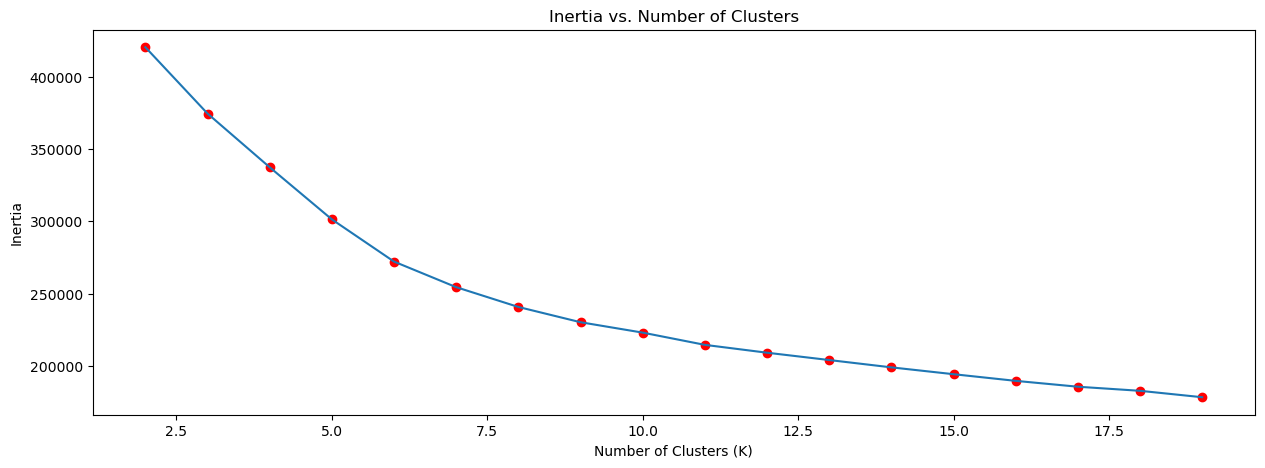

In [37]:
# Create KMEANS model.
# Find the optimum number of clusters using INERTIA

K = range(2, 20)
inertia_list = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.plot(K, inertia_list)
plt.scatter(K, inertia_list, color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

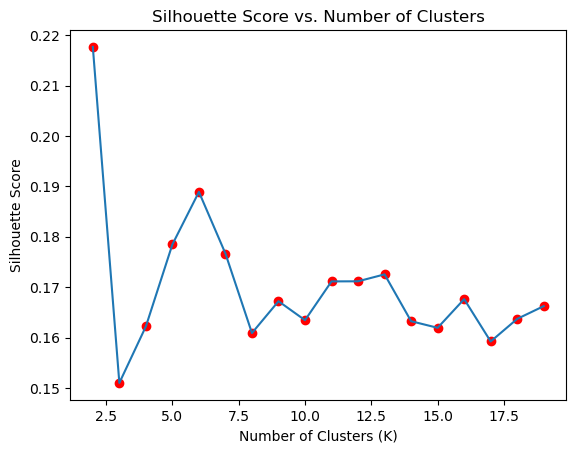

In [38]:
# Find the optimum number of clusters using SILHOUETTE SCORE
K = range(2,20)
silhouette_list = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X)
    silhouette_list.append(silhouette_score(X, kmeans.predict(X)))
    
plt.plot(K, silhouette_list)
plt.scatter(K, silhouette_list, color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [92]:
# Run KMeans model using n_clusters = 6
kmeans = KMeans(n_clusters= 6, random_state=1234)
kmeans.fit(X)
model_filename = 'kmeans.pkl'
pickle.dump(kmeans, open(model_filename, 'wb'))
print(f"KMeans inertia is: {kmeans.inertia_}")
print(f"KMeans Silhouette score is : {silhouette_score(X, kmeans.predict(X))}")

KMeans inertia is: 272196.0330460539
KMeans Silhouette score is : 0.18889367013440972


In [93]:
# Compute the clusters and export dataframe to csv.
clusters_kmeans = kmeans.predict(X)
X['cluster_KM'] = clusters_kmeans
X['id'] = y
X.to_csv('features_clusters_ids.csv')
cluster_number = pd.Series(clusters_kmeans).value_counts().sort_index()

In [64]:
cluster_number

0    19616
1    12627
2     7351
3      848
4     7498
5     5726
dtype: int64

In [7]:
# Create DBSCAN model.
# Find the distance threshold (Epsilon)
# k = len(X.columns) + 1
# nearest_neighbors = NearestNeighbors(n_neighbors=k)
# neighbors = nearest_neighbors.fit(X)
# distances, indices = neighbors.kneighbors(X)
# distances = np.sort(distances[:,-1], axis=0)
# plt.plot(distances)
# plt.show()

In [35]:
# Initialise a DBSCAN model using Epsilon = 2.5

# dbscan = DBSCAN(eps=3,min_samples=100)
# model_file = 'dbscan.pkl'
# pickle.dump(dbscan, open(model_file, 'wb'))
# cluster_dbscan = dbscan.fit_predict(X)
# cluster_number = pd.Series(clusters_dbscan).value_counts().sort_index()
# cluster_number
# print(f"DBSCAN Silhouette score is : {silhouette_score(X, clusters_dbscan)}")
# X['cluster_DBSCAN'] = cluster_dbscan

In [65]:
cluster_vis = pd.read_csv('features_clusters_ids.csv')
cluster_vis = cluster_vis.drop(["Unnamed: 0"], axis=1)

In [66]:
cluster_vis.head()

,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,cluster_KM
0,-0.546404,-0.903584,0.730926,-1.332889,-0.374006,-0.744581,-0.472015,-0.315373,-0.460036,1
1,-1.400040,-0.062371,-0.882915,0.750250,-0.336194,-0.091887,-0.473081,0.365329,0.787209,0
2,0.908788,0.498438,-0.530451,0.750250,-0.302678,-0.725325,2.664286,-0.758952,0.286427,5
3,-1.422956,-1.464393,0.301352,-1.332889,0.046226,-0.741097,-0.473639,2.545821,0.862193,2
4,0.845768,0.498438,-0.560256,0.750250,-0.422990,-0.482202,0.202869,-0.761570,-0.225591,0


In [8]:
# sns.pairplot(cluster_vis, hue='cluster_KM', size=50)


## Day 3

In [3]:
# DEFINE FUNCTIONS:
# Define functions to check if the user´s song is in the Billboard Top 100 list.

URL = "https://www.billboard.com/charts/hot-100/"

def get_top_100(url): 
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    chart_items = soup.select("ul > li.lrv-u-width-100p")
    songs = []

    for item in chart_items:
        title = item.find("h3")
        if title:
            song_title = title.get_text().strip()
            artist = item.select_one(".lrv-u-flex > span").get_text().strip()
            songs.append({"title": song_title, "artist": artist})
    df = pd.DataFrame(songs)
    return df


def is_top_100(input_song, df):
    if df.title.isin([input_song]).any():
        return True
    else:
        return False
    
# Define function to get the audio features of the selected song:

def get_audio_features(input_song):
    try:
        results = sp.search(q=input_song, type='track')

        if results['tracks']['items']:
            track_id = results['tracks']['items'][0]['id']
        else:
            print("Song not found.")

        audio_features = sp.audio_features(tracks=[track_id])

        if audio_features:
            song_df = pd.DataFrame(audio_features)
            song_df = song_df.drop(['type','uri', 'track_href', 'analysis_url', 'duration_ms', 'energy', 'time_signature', 'valence'], axis=1)
            return song_df
            print(song_df.head())
        else:
            print(f"Audio features for {input_song} not found.")
    except spotipy.SpotifyException:
        raise RuntimeError("Error: Failed to retrieve audio features.")
        
# Define function to scale and cluster the song selected by the user:

def get_cluster_song(song_df):
    scaler_filename = 'scaler_sd.pkl'
    loaded_scaler = pickle.load(open(scaler_filename, 'rb'))
    model_filename = 'kmeans.pkl'
    loaded_model = pickle.load(open(model_filename, 'rb'))
    
    song_y = song_df['id']
    song_x = song_df.drop(['id'], axis=1)
    song_X = pd.DataFrame(loaded_scaler.transform(song_x), columns=song_x.columns)
    
    cluster = loaded_model.predict(song_X)
    return int(cluster)

# Define function to randomly select a song from the same cluster

def get_random_song_id(cluster):
    df = pd.read_csv('features_clusters_ids.csv')
    df = df.drop(['Unnamed: 0'], axis=1)
    filtered_df = df[df['cluster_KM'] == cluster]
    random_row = filtered_df.sample()
    random_song_id = random_row['id'].values[0]
    return random_song_id

def get_song_details(random_song_id):
    try:
        track = sp.track(random_song_id)
        song_name = track['name']
        artists = [artist['name'] for artist in track['artists']]
        print(f"The selected song is not in the Billboard Top 100.")
        print(f"A recommended similar song is '{song_name}', by '{', '.join(artists)}'")
    except spotipy.SpotifyException:
        raise RuntimeError('Error: Failed to retrieve song details.')

    
def main():
    input_song = input('Enter a song name: ').strip()
    if not input_song:
        print("Error: Empty song name. Please enter a valid song name.")
        return
    df = get_top_100(URL)
    if is_top_100(input_song, df):
        another_top_100 = df.sample()
        title = another_top_100['title'].values[0]
        artist = another_top_100['artist'].values[0]
        print(f"Congratulations! Your selected song is already in the Billboard Top 100.")
        print(f"Here is another Billboard Top 100 song: '{title}' by '{artist}'")
    else:
        song_df = get_audio_features(input_song)
        cluster = get_cluster_song(song_df)
        random_song_id = get_random_song_id(cluster)
        print(f"The cluster is:{cluster}")
        get_song_details(random_song_id)

In [4]:
main()

Enter a song name: Break the ice
The cluster is:1
The selected song is not in the Billboard Top 100.
A recommended similar song is 'Keep The Family Close', by 'Drake'
